In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score #Confusion matrix
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
salary_df = pd.read_csv("salary_class.csv")

In [13]:
salary_df.head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [4]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       46043 non-null  object
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [73]:
salary_df.describe()

,Unnamed: 0,age,education-num,capital-gain,capital-loss,hours-per-week,class
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,24420.500000,38.643585,10.078089,1079.067626,87.502314,40.422382,0.239282
std,14099.615261,13.710510,2.570973,7452.019058,403.004552,12.391444,0.426649
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,12210.250000,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,24420.500000,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,36630.750000,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,48841.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


- 결측치가 있는데 제거해도 될 듯

#### 각 컬럼 요소 살펴보기

In [7]:
salary_df['workclass'].unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
salary_df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [9]:
salary_df['education-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

In [10]:
salary_df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [14]:
salary_df['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [70]:
salary_df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', nan,
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [71]:
salary_df['class'].unique()

array([0, 1], dtype=int64)

#### 범주형데이터 처리

In [3]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

#한글 폰트 가져오기
plt.rcParams['axes.unicode_minus']=False

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

In [4]:
encoding_columns = ['workclass','education','marital-status', 'occupation', \
                    'relationship','race','sex','native-country']
not_encoding_columns = ['age', 'education-num','capital-gain', \
                        'capital-loss','hours-per-week']

In [5]:
from sklearn.preprocessing import LabelEncoder
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [6]:
salary_encoding = salary_df[encoding_columns].apply(encoding_label)
salary_encoding.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,3,1,4,6,3,2,1,38
1,3,11,2,4,0,4,1,38
2,1,7,2,10,0,4,1,38
3,3,15,2,6,0,2,1,38
4,8,15,4,14,3,4,0,38


In [7]:
salary_not_encoding = salary_df[not_encoding_columns]
salary_not_encoding.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30


In [9]:
salary_encoding_df=pd.concat([salary_encoding,salary_not_encoding],axis=1)

#### 항목간 관계성 파악

In [68]:
salary_encoding_df.corr()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,education-num,capital-gain,capital-loss,hours-per-week
workclass,1.000000,-0.011582,0.045986,0.316706,0.018185,0.023833,-0.000207,-0.001114,0.051579,-0.052849,0.008116,-0.005973,-0.095300
education,-0.011582,1.000000,-0.037417,-0.038054,-0.010758,0.013250,-0.027041,0.074711,-0.015058,0.359668,0.028928,0.017638,0.057659
marital-status,0.045986,-0.037417,1.000000,0.050256,0.187800,-0.070104,-0.127479,-0.017103,-0.263978,-0.069992,-0.043969,-0.033872,-0.185567
occupation,0.316706,-0.038054,0.050256,1.000000,-0.010773,-0.009934,0.021866,0.000309,0.006784,0.045126,0.008157,0.006845,-0.060462
relationship,0.018185,-0.010758,0.187800,-0.010773,1.000000,-0.117041,-0.579797,-0.007113,-0.263383,-0.090534,-0.056510,-0.057201,-0.250400
race,0.023833,0.013250,-0.070104,-0.009934,-0.117041,1.000000,0.086734,0.112394,0.028421,0.029239,0.011581,0.018595,0.039694
sex,-0.000207,-0.027041,-0.127479,0.021866,-0.579797,0.086734,1.000000,-0.001664,0.088120,0.009328,0.047094,0.045480,0.228560
native-country,-0.001114,0.074711,-0.017103,0.000309,-0.007113,0.112394,-0.001664,1.000000,-0.002529,0.091798,0.008670,0.006654,0.006896
age,0.051579,-0.015058,-0.263978,0.006784,-0.263383,0.028421,0.088120,-0.002529,1.000000,0.030940,0.077229,0.056944,0.071558
education-num,-0.052849,0.359668,-0.069992,0.045126,-0.090534,0.029239,0.009328,0.091798,0.030940,1.000000,0.125146,0.080972,0.143689


- 대부분의 항목들이 유의미한 관계성을 갖지 않는다
- workclass ~ occupation (0.316706)
- education ~ education-num (0.359668)
- marital-status ~ relationship(0.187800),hours-per-week(-0.185567)
- relationship ~ sex (-0.579797)
- relationship ~ age (-0.263383)
- relationship ~ hours-per-week (-0.250400)
- sex ~ hours-per-week (0.228560)

In [50]:
salary_df_na = salary_df.dropna()

In [58]:
salary_not_encoding.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.030940,0.077229,0.056944,0.071558
education-num,0.030940,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,0.143689,0.082157,0.054467,1.000000


In [35]:
salary_category=pd.concat([salary_encoding,salary_df["capital-gain"]],axis=1)
salary_category.corr()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,capital-gain
workclass,1.000000,-0.011582,0.045986,0.316706,0.018185,0.023833,-0.000207,-0.001114,0.008116
education,-0.011582,1.000000,-0.037417,-0.038054,-0.010758,0.013250,-0.027041,0.074711,0.028928
marital-status,0.045986,-0.037417,1.000000,0.050256,0.187800,-0.070104,-0.127479,-0.017103,-0.043969
occupation,0.316706,-0.038054,0.050256,1.000000,-0.010773,-0.009934,0.021866,0.000309,0.008157
relationship,0.018185,-0.010758,0.187800,-0.010773,1.000000,-0.117041,-0.579797,-0.007113,-0.056510
race,0.023833,0.013250,-0.070104,-0.009934,-0.117041,1.000000,0.086734,0.112394,0.011581
sex,-0.000207,-0.027041,-0.127479,0.021866,-0.579797,0.086734,1.000000,-0.001664,0.047094
native-country,-0.001114,0.074711,-0.017103,0.000309,-0.007113,0.112394,-0.001664,1.000000,0.008670
capital-gain,0.008116,0.028928,-0.043969,0.008157,-0.056510,0.011581,0.047094,0.008670,1.000000


array([[<Axes: xlabel='workclass', ylabel='workclass'>,
        <Axes: xlabel='education', ylabel='workclass'>,
        <Axes: xlabel='marital-status', ylabel='workclass'>,
        <Axes: xlabel='occupation', ylabel='workclass'>,
        <Axes: xlabel='relationship', ylabel='workclass'>,
        <Axes: xlabel='race', ylabel='workclass'>,
        <Axes: xlabel='sex', ylabel='workclass'>,
        <Axes: xlabel='native-country', ylabel='workclass'>,
        <Axes: xlabel='capital-gain', ylabel='workclass'>],
       [<Axes: xlabel='workclass', ylabel='education'>,
        <Axes: xlabel='education', ylabel='education'>,
        <Axes: xlabel='marital-status', ylabel='education'>,
        <Axes: xlabel='occupation', ylabel='education'>,
        <Axes: xlabel='relationship', ylabel='education'>,
        <Axes: xlabel='race', ylabel='education'>,
        <Axes: xlabel='sex', ylabel='education'>,
        <Axes: xlabel='native-country', ylabel='education'>,
        <Axes: xlabel='capital-gain', 

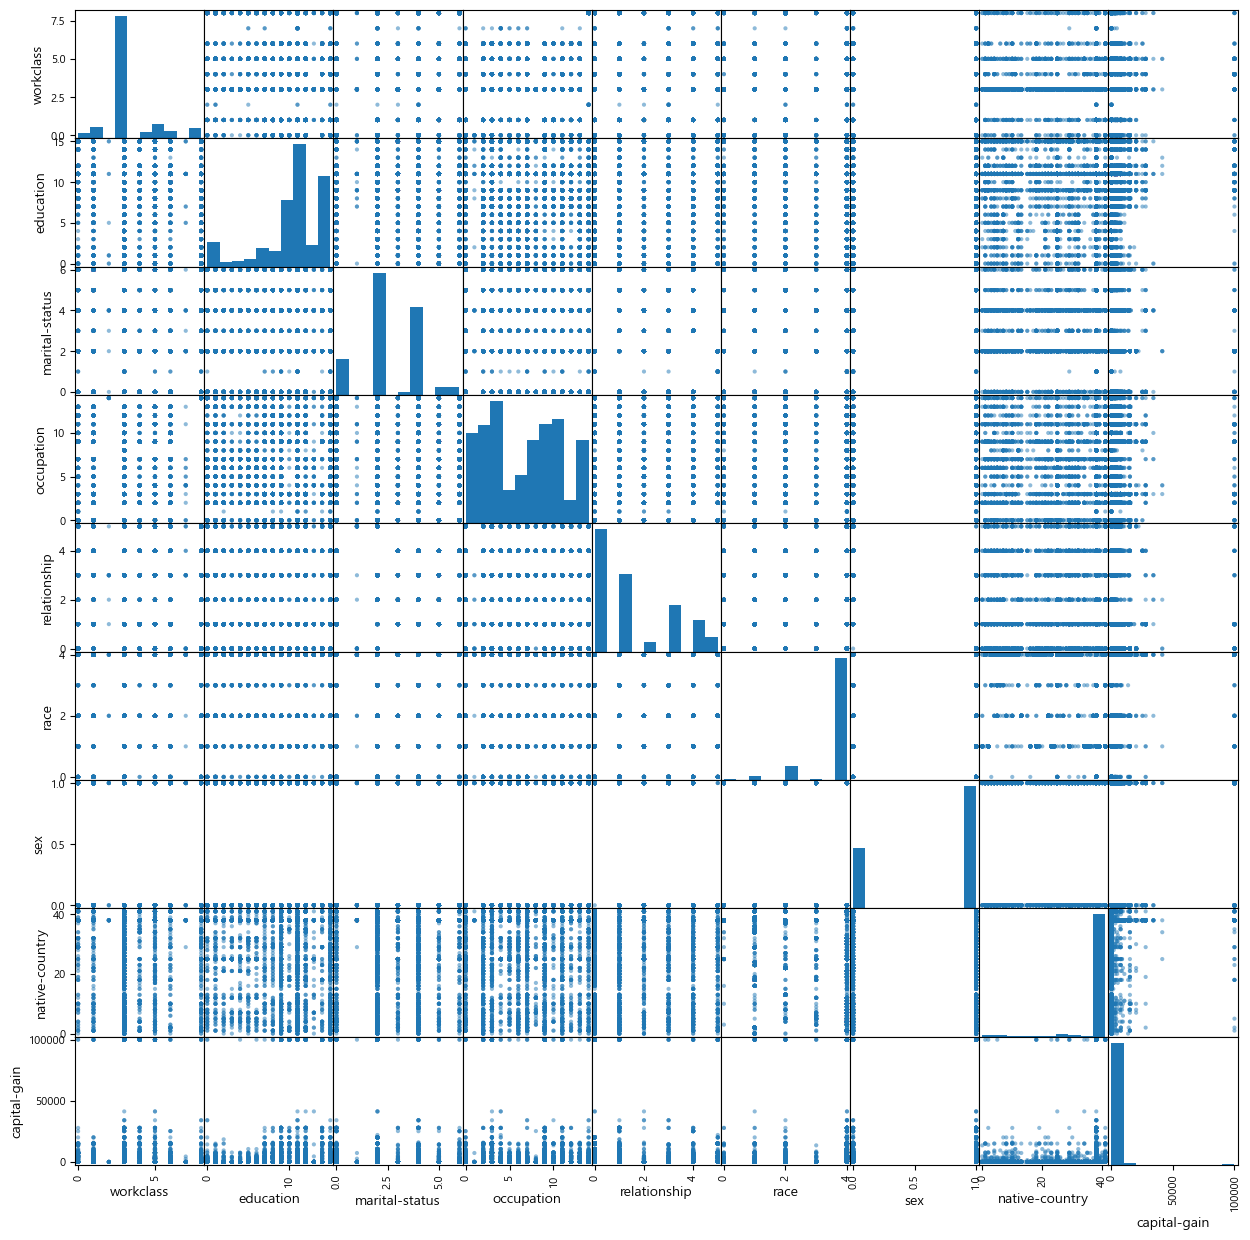

In [36]:
pd.plotting.scatter_matrix(salary_category,figsize=(15,15))

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='education-num', ylabel='age'>,
        <Axes: xlabel='capital-gain', ylabel='age'>,
        <Axes: xlabel='capital-loss', ylabel='age'>,
        <Axes: xlabel='hours-per-week', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='education-num'>,
        <Axes: xlabel='education-num', ylabel='education-num'>,
        <Axes: xlabel='capital-gain', ylabel='education-num'>,
        <Axes: xlabel='capital-loss', ylabel='education-num'>,
        <Axes: xlabel='hours-per-week', ylabel='education-num'>],
       [<Axes: xlabel='age', ylabel='capital-gain'>,
        <Axes: xlabel='education-num', ylabel='capital-gain'>,
        <Axes: xlabel='capital-gain', ylabel='capital-gain'>,
        <Axes: xlabel='capital-loss', ylabel='capital-gain'>,
        <Axes: xlabel='hours-per-week', ylabel='capital-gain'>],
       [<Axes: xlabel='age', ylabel='capital-loss'>,
        <Axes: xlabel='education-num', ylabel='capital-loss'>,
        <

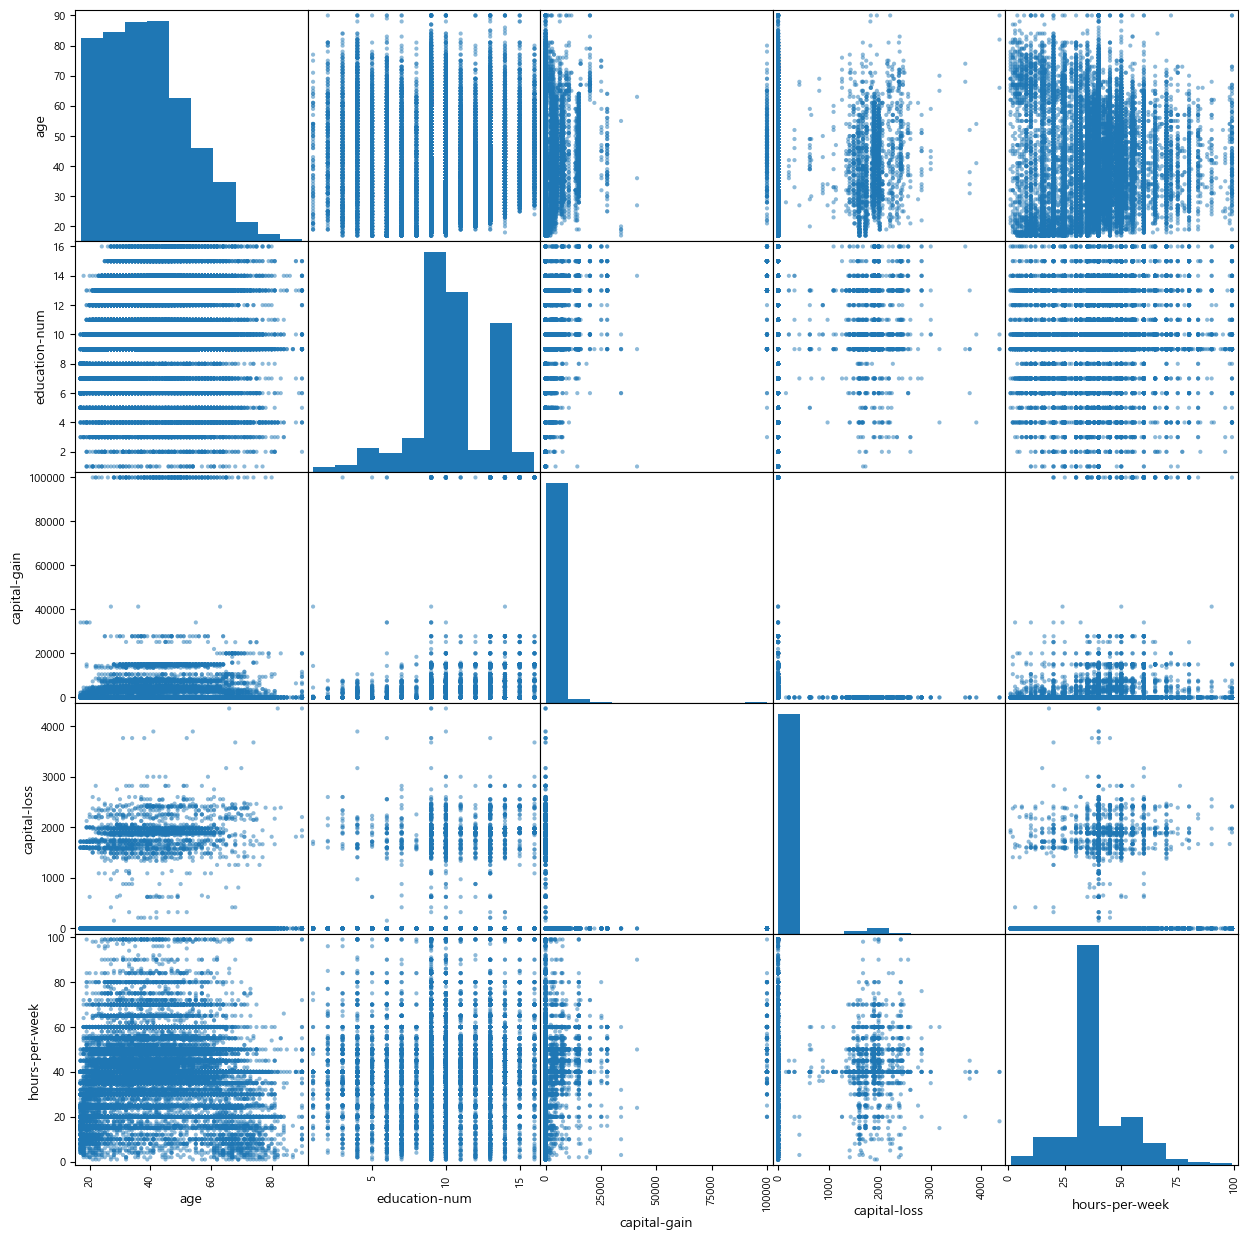

In [57]:
pd.plotting.scatter_matrix(salary_not_encoding,figsize=(15,15))

In [10]:
features = salary_encoding_df[['workclass','education','marital-status', 'occupation', \
                    'relationship','race','sex','native-country','age', 'education-num','hours-per-week']]

In [11]:
label=salary_encoding_df[['capital-gain']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=111)

In [30]:
X_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,education-num,hours-per-week
25163,3,12,2,3,0,4,1,38,48,14,40
45670,3,11,0,0,1,4,0,38,30,9,40
39742,3,11,4,0,4,2,0,38,37,9,40
35453,4,11,0,11,1,4,1,38,83,9,20
16948,3,11,2,2,0,2,1,38,42,9,40
...,...,...,...,...,...,...,...,...,...,...,...
40211,3,9,0,3,4,4,0,38,42,13,45
36950,3,8,4,4,3,4,1,38,20,11,40
4820,3,15,2,2,0,4,1,38,45,10,46
10196,3,11,4,5,3,4,1,38,22,9,40


In [31]:
model = DecisionTreeClassifier()
model_sp1 = DecisionTreeClassifier(random_state=111, max_depth=3)

model.fit(X_train, y_train) #모델 학습

model_sp1.fit(X_train, y_train) #모델 학습

pred_train = model.predict(X_train) #train 예측
pred_test = model.predict(X_test) # test예측

pred_train_sp = model_sp1.predict(X_train) #train 예측
pred_test_sp = model_sp1.predict(X_test) # test예측

In [32]:
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.9786809305658639
0.8477838059166752


In [33]:
print(accuracy_score(y_train, pred_train_sp))
print(accuracy_score(y_test, pred_test_sp))

0.916387275100453
0.9213839697000716


- 깊이제한을 3으로 설정하자 train세트의 정확도는 0.6감소했지만 test 세트의 정확도가 0.8만큼 증가했다

### 교차검증 추가하기

In [37]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5) #데이터셋 분리

cv_accuracy_train = []
cv_accuracy_test = []
kf_model = DecisionTreeClassifier(random_state=111,max_depth=3)

In [38]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [39]:
n_iter = 0 #5번 진행하니 초깃값 설정

for train_idx, test_idx in kfold.split(features):
    X_train, X_test = features.iloc[train_idx], features.iloc[test_idx]
    y_train, y_test = label.iloc[train_idx], label.iloc[test_idx]
    
    #학습을 위해서 dt배우기
    kf_model.fit(X_train, y_train)
    #예측
    kf_pred_train = kf_model.predict(X_train)
    df_pred_test = kf_model.predict(X_test)
    
    #정확도를 5번 측정하면서 값에 넣을 것이니
    n_iter +=1
    accuracy_train = np.round(accuracy_score(y_train, kf_pred_train),4)
    accuracy_test = np.round(accuracy_score(y_test, df_pred_test),4)
    
    print('\n{} 번 train 교차 검증 정확도 :{} ,test 교차 검증 정확도 :{} '.format(n_iter,accuracy_train, accuracy_test))
    
    cv_accuracy_train.append(accuracy_train)
    cv_accuracy_test.append(accuracy_test)
    
print('train 평균 정확도',np.mean(cv_accuracy_train))
print('test 평균 정확도',np.mean(cv_accuracy_test))


1 번 train 교차 검증 정확도 :0.9171 ,test 교차 검증 정확도 :0.9184 

2 번 train 교차 검증 정확도 :0.9172 ,test 교차 검증 정확도 :0.9181 

3 번 train 교차 검증 정확도 :0.9175 ,test 교차 검증 정확도 :0.9169 

4 번 train 교차 검증 정확도 :0.9168 ,test 교차 검증 정확도 :0.9197 

5 번 train 교차 검증 정확도 :0.9183 ,test 교차 검증 정확도 :0.9138 
train 평균 정확도 0.91738
test 평균 정확도 0.91738


### Skf 모델 진행
- kfold 문제점은?
- 정답 라벨이 0,1,2 총 3개 -> Kfold는 랜덤하게 데이터를 추출하기 때문에 정답 비중이 고르게 분포하지 않을 수 있다
- 그러다보니 정답레이블이 불균형 또는 다중분류인 경우는 SKF를 통해서 정답 라벨 불균형을 해소

In [41]:
from sklearn.model_selection import StratifiedKFold

skf_salary = StratifiedKFold(n_splits=3)
cnt_iter=0

In [42]:
skf_salary

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [43]:
n_iter=0

skf_cv_accuracy_train = []
skf_cv_accuracy_test = []
skf_model = DecisionTreeClassifier(random_state=111, max_depth=3)

for train_idx, test_idx in skf_salary.split(features, label):
    X_train, X_test = features.iloc[train_idx], features.iloc[test_idx]
    y_train, y_test = label.iloc[train_idx], label.iloc[test_idx]
    
    #학습을 위해서 dt배우기
    skf_model.fit(X_train, y_train)
    #예측
    skf_pred_train = skf_model.predict(X_train)
    skf_pred_test = skf_model.predict(X_test)
    
    #정확도를 5번 측정하면서 값에 넣을 것이니
    n_iter +=1
    accuracy_train = np.round(accuracy_score(y_train, skf_pred_train),4)
    accuracy_test = np.round(accuracy_score(y_test, skf_pred_test),4)
    
    print('\n{} 번 train 교차 검증 정확도 :{} ,test 교차 검증 정확도 :{} '.format(n_iter,accuracy_train, accuracy_test))
    
    skf_cv_accuracy_train.append(accuracy_train)
    skf_cv_accuracy_test.append(accuracy_test)
    
print('train 평균 정확도',np.mean(skf_cv_accuracy_train))
print('test 평균 정확도',np.mean(skf_cv_accuracy_test))


1 번 train 교차 검증 정확도 :0.9174 ,test 교차 검증 정확도 :0.9174 

2 번 train 교차 검증 정확도 :0.9174 ,test 교차 검증 정확도 :0.9174 

3 번 train 교차 검증 정확도 :0.9174 ,test 교차 검증 정확도 :0.9174 
train 평균 정확도 0.9174000000000001
test 평균 정확도 0.9174000000000001


C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [48]:
kfold= KFold(n_splits=5) 
n_iter = 0

for train_idx, test_idx in kfold.split(salary_encoding_df):
    n_iter +=1
    label_train = salary_encoding_df['capital-gain'].iloc[train_idx]
    label_test = salary_encoding_df['capital-gain'].iloc[test_idx]
    print('학습 정답 레이블', label_train.value_counts())
    print('학습 정답 레이블', label_test.value_counts())

학습 정답 레이블 0        35835
15024      414
7688       338
7298       295
99999      187
         ...  
1455         1
6612         1
1111         1
22040        1
5060         1
Name: capital-gain, Length: 121, dtype: int64
학습 정답 레이블 0        8972
15024      99
7688       72
7298       69
99999      57
         ... 
3471        1
1264        1
1471        1
25236       1
7443        1
Name: capital-gain, Length: 104, dtype: int64
학습 정답 레이블 0        35838
15024      406
7688       326
7298       290
99999      201
         ...  
1731         1
7262         1
1639         1
1264         1
2387         1
Name: capital-gain, Length: 121, dtype: int64
학습 정답 레이블 0        8969
15024     107
7688       84
7298       74
99999      43
         ... 
4931        1
2907        1
7443        1
6612        1
2062        1
Name: capital-gain, Length: 99, dtype: int64
학습 정답 레이블 0        35851
15024      417
7688       324
7298       291
99999      196
         ...  
1111         1
6612         1
1424     